# Exercise 5

Work on this before the next lecture on 8 May. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

## Question 1

You can use PCA as a form of noise filtering. The idea why this might work goes like this: overall the PCA components representing the noise will explain less of the variance in the dataset than the components related to the actual data. So if you keep only the high variance components you can remove (some) of the noise.

* plot some of the digits before and after the noise has been added
* fit a `PCA` transformer to the digit dataset
* experiment with the number of components you need to get a good reconstruction of the digits that supresses the noise.
* (bonus) is there a quantitative way to pick the best number of components?

(Note: You can use this for high dimensional tabular data as well. Instead of training your classifier on all the features you can first transform your data and only use the first "few" components, thereby removing the noise.)

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# fluctuate each pixel's intensity by drawing from a gaussian
# with mean equal to the pixels value and std=4
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)

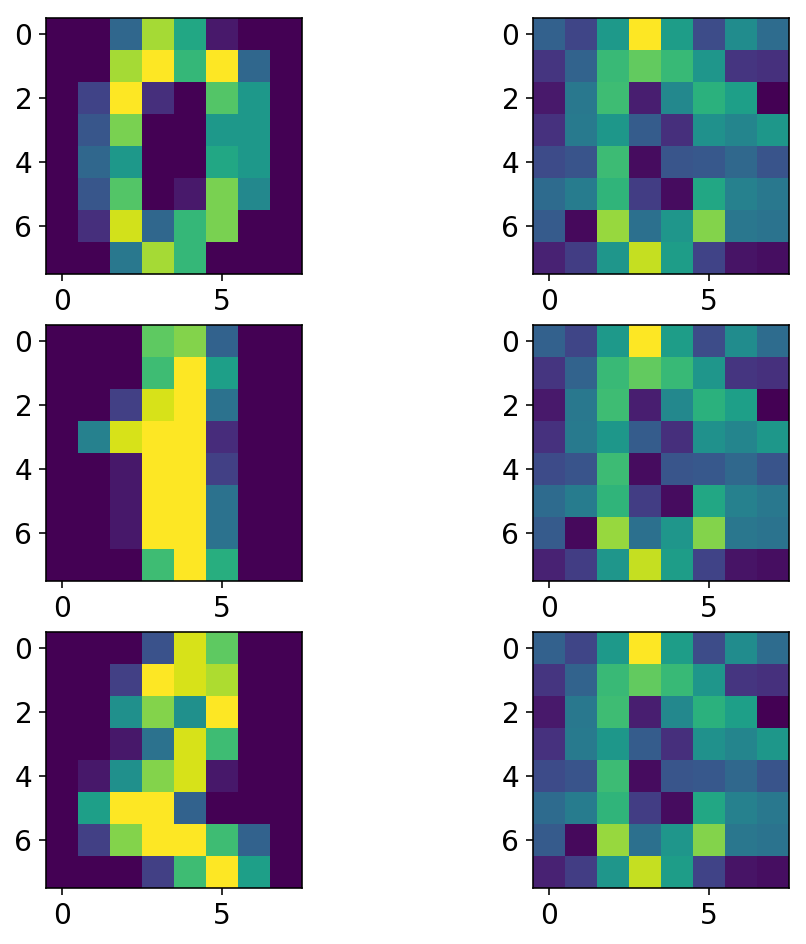

In [7]:
for i in range(3):
    digit = digits.data[i]
    plt.subplot(3,2,1+2*i)
    plt.imshow(digit.reshape((8,8)))
    plt.subplot(3,2,2+2*i)
    plt.imshow(noisy[0].reshape((8,8)))

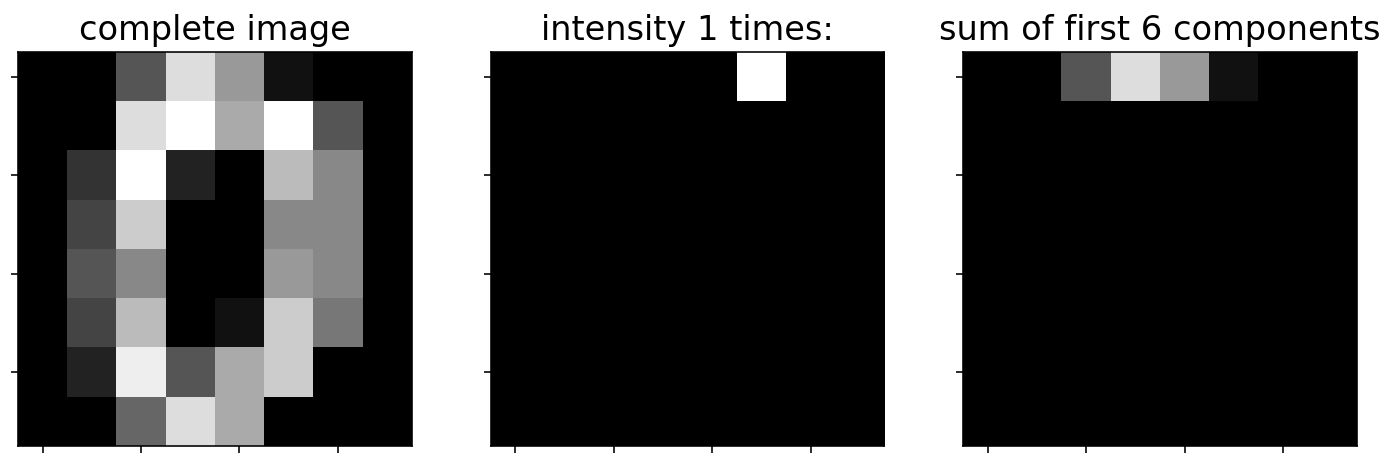

In [52]:
### FROM LECTURE

def pixel_basis(n):
    """One pixel basis vector `n`"""
    vector = np.zeros(64)
    vector[n] = 255
    return vector.reshape(8, 8)

def show_pixel_basis(n_components=6):
    digit = digits.images[0]
    fig, axs = plt.subplots(1, 3, figsize=(3*4, 4))
    axs[0].imshow(digit, cmap='gray')
    axs[0].set_yticklabels([])
    axs[0].set_xticklabels([])
    axs[0].set_title("complete image")

    sum = np.zeros(64)
    for n in range(n_components):
        sum[n] = digit.ravel()[n]
        ax = axs[1]
        ax.imshow(pixel_basis(n), cmap='gray', vmin=0, vmax=digit.max())
        ax.set_title("intensity %i times:" % digit.ravel()[n])
        ax.set_yticklabels([])
        ax.set_xticklabels([])


    ax = axs[-1]
    ax.set_title("sum of first %i components" % n_components)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(sum.reshape(8,8), cmap='gray', vmin=0, vmax=digit.max())
    plt.show();
    
from ipywidgets import interact

interact(show_pixel_basis, n_components=(1,63));

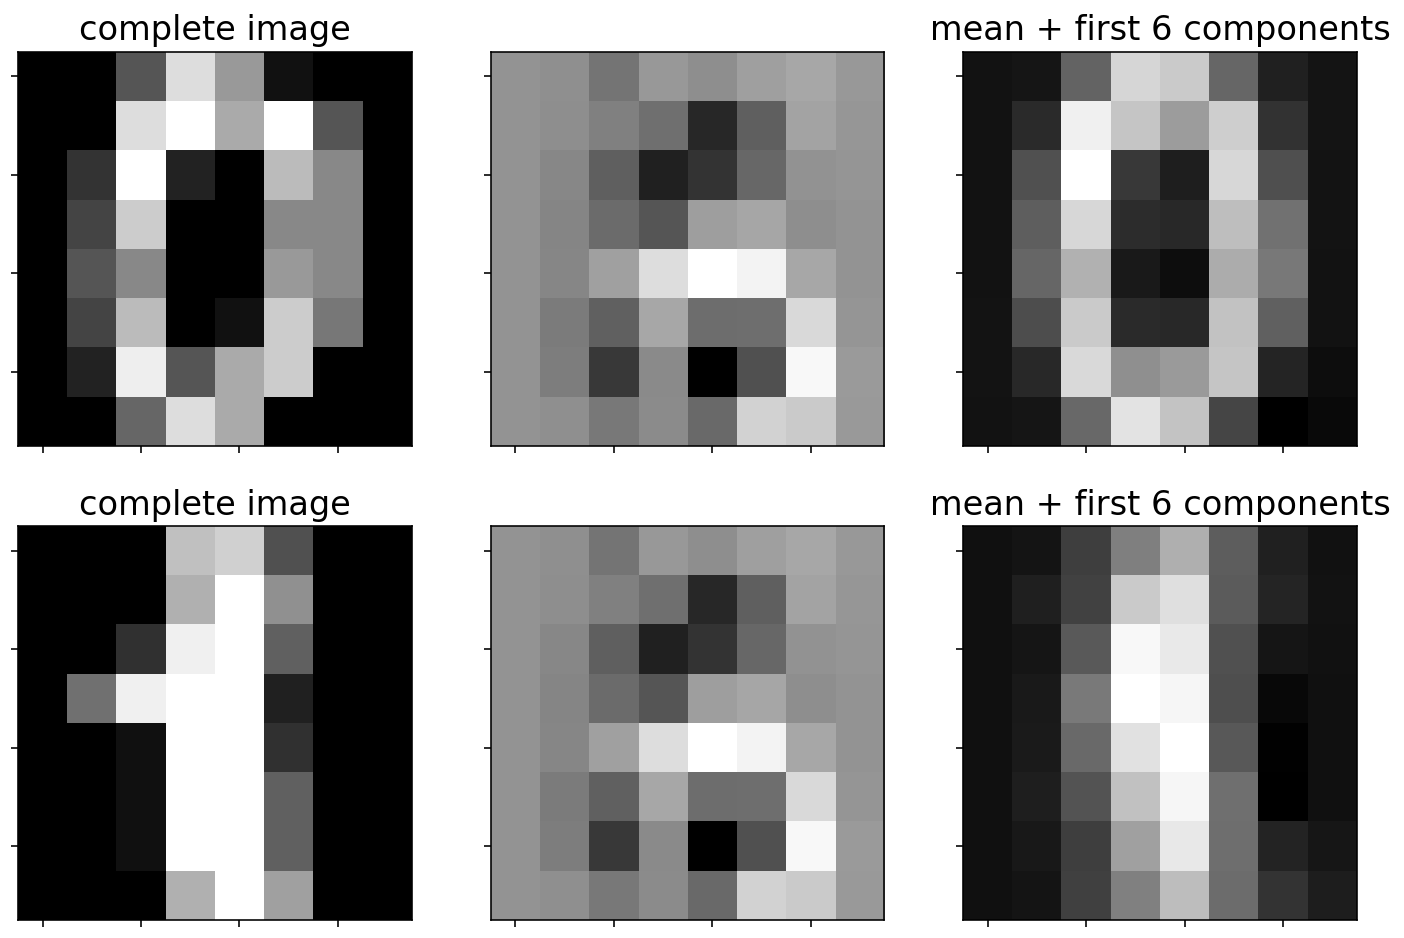

In [54]:
### FROM LECTURE

from sklearn.decomposition import PCA

def show_digit(n_components=6):
    fig, axs = plt.subplots(2, 3, figsize=(12, 2*4))

    for n in range(2):
        digit = digits.data[n]
        ax = axs[n,0]
        ax.set_title('complete image')
        ax.imshow(digit.reshape(8,8), cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        pca = PCA(n_components)
        pca.fit(digits.data)

        # components
        ax = axs[n,1]
        if n_components == 1:
            template = pca.mean_.reshape(8,8)
        else:
            template = pca.components_[n_components-1].reshape(8,8)
        template = pca.components_[n_components-1].reshape(8,8)
        ax.imshow(template, cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        ax = axs[n,2]
        ax.imshow(pca.inverse_transform(pca.transform(digit.reshape(1, -1))).reshape(8,8), 
                  cmap='gray')
        ax.set_title('mean + first %i components' % (n_components))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()
    
interact(show_digit, n_components=(1,63));

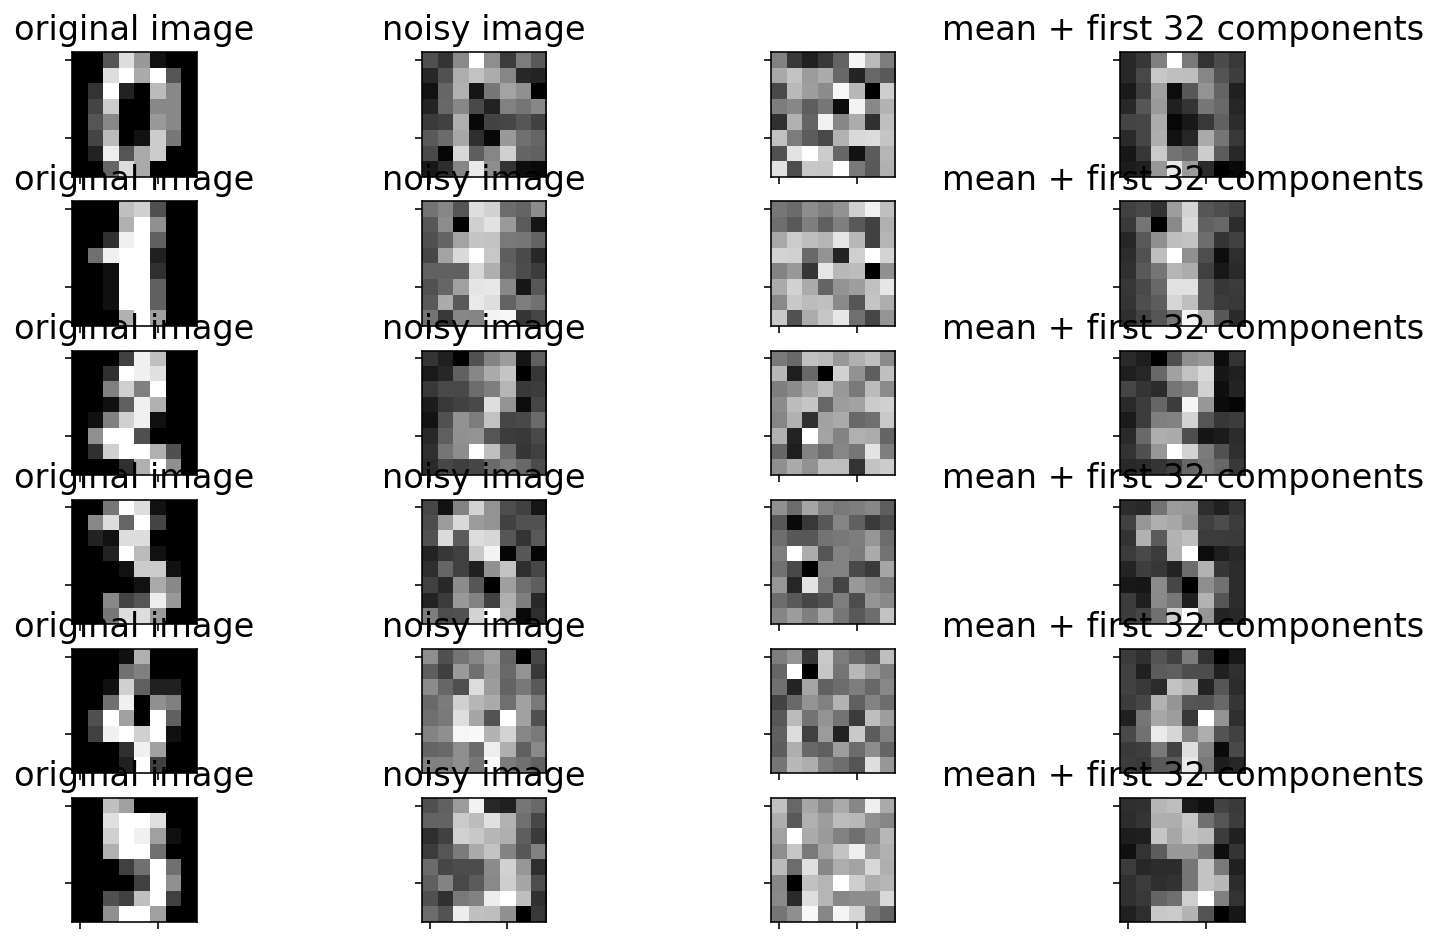

In [69]:
def show_noisy_digit(n_components='mle'):
    N = 6
    fig, axs = plt.subplots(N, 4, figsize=(12, 2*4))

    for n in range(N):
        digit = digits.data[n]
        ax = axs[n,0]
        ax.set_title('original image')
        ax.imshow(digit.reshape(8,8), cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
        noisy_digit = noisy[n]
        ax = axs[n,1]
        ax.set_title('noisy image')
        ax.imshow(noisy_digit.reshape(8,8), cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        pca = PCA(n_components)
        pca.fit(noisy)

        # components
        ax = axs[n,2]
        if n_components == 1:
            template = pca.mean_.reshape(8,8)
        else:
            template = pca.components_[n_components-1].reshape(8,8)
        template = pca.components_[n_components-1].reshape(8,8)
        ax.imshow(template, cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        ax = axs[n,3]
        ax.imshow(pca.inverse_transform(pca.transform(noisy_digit.reshape(1, -1))).reshape(8,8), 
                  cmap='gray')
        ax.set_title('mean + first %i components' % (n_components))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()
    
interact(show_noisy_digit, n_components=(1,63));

In [59]:
help(pca.inverse_transform)

Help on method inverse_transform in module sklearn.decomposition.base:

inverse_transform(X, y=None) method of sklearn.decomposition.pca.PCA instance
    Transform data back to its original space.
    
    In other words, return an input X_original whose transform would be X.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_components)
        New data, where n_samples is the number of samples
        and n_components is the number of components.
    
    Returns
    -------
    X_original array-like, shape (n_samples, n_features)
    
    Notes
    -----
    If whitening is enabled, inverse_transform will compute the
    exact inverse operation, which includes reversing whitening.



---

## Question 2

Apply PCA to a dataset that contains two gaussian blobs. Imagine this is a toy version of a real problem where you are trying to separate the dark from the light points. Before using the `PCA` transformer make a prediction for the two principle components from your intuition.

* draw the principle components PCA finds
* reduce the dimensionality of the data to one dimension using the `transform` method of the `PCA` transformer
* plot your transformed dataset, can you separate the two classes using only the first principle component?
* A technique related to PCA that makes use of the class labels is called linear discriminant analysis (LDA). How does LDA perform on this problem?
* Can you explain why PCA fails?

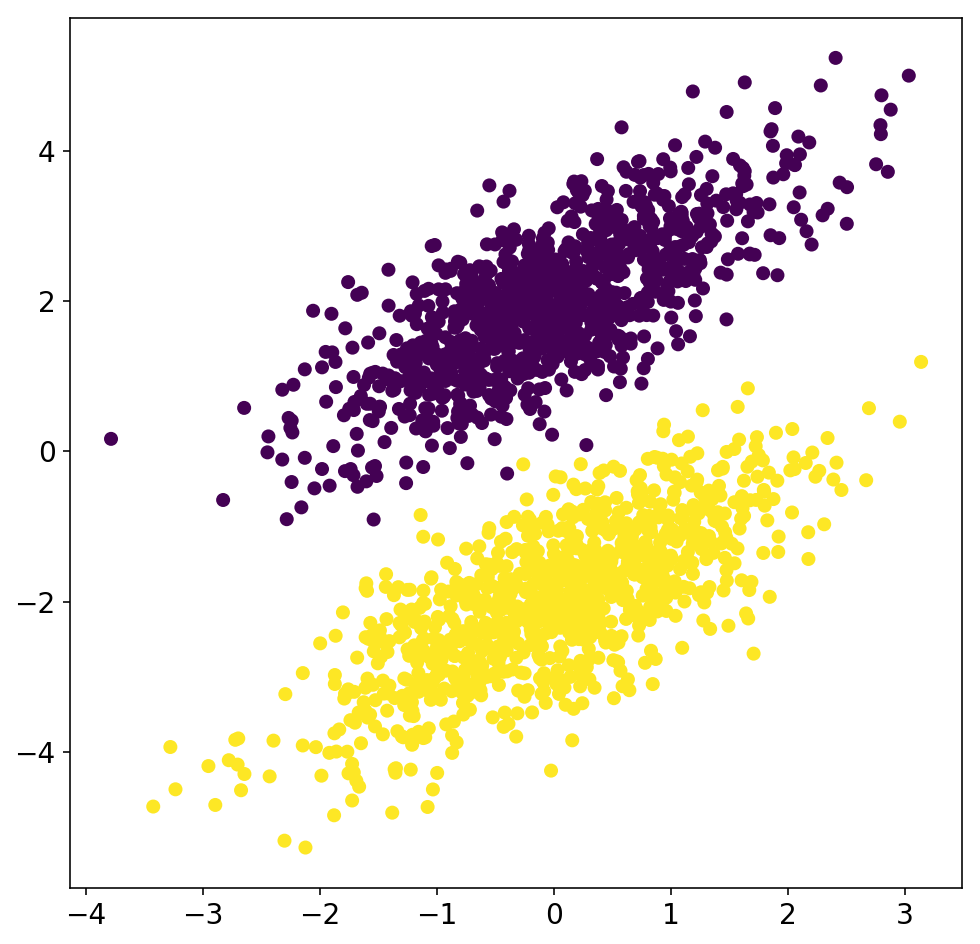

In [45]:
N = 1000
m1 = (1,1)
m2 = (1,4)
C = ((1,0.75), (0.75,1))
g1 = np.random.multivariate_normal((0, -2), C, N)
g2 = np.random.multivariate_normal((0, +2), C, N)

X = np.vstack((g1, g2))
y = np.hstack((np.ones(N), np.zeros(N)))

plt.scatter(X[:,0], X[:,1], c=y);

In [46]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-4.1358246984670535,
 3.4945725506061285,
 -5.8051433371480892,
 5.7702846038635363)

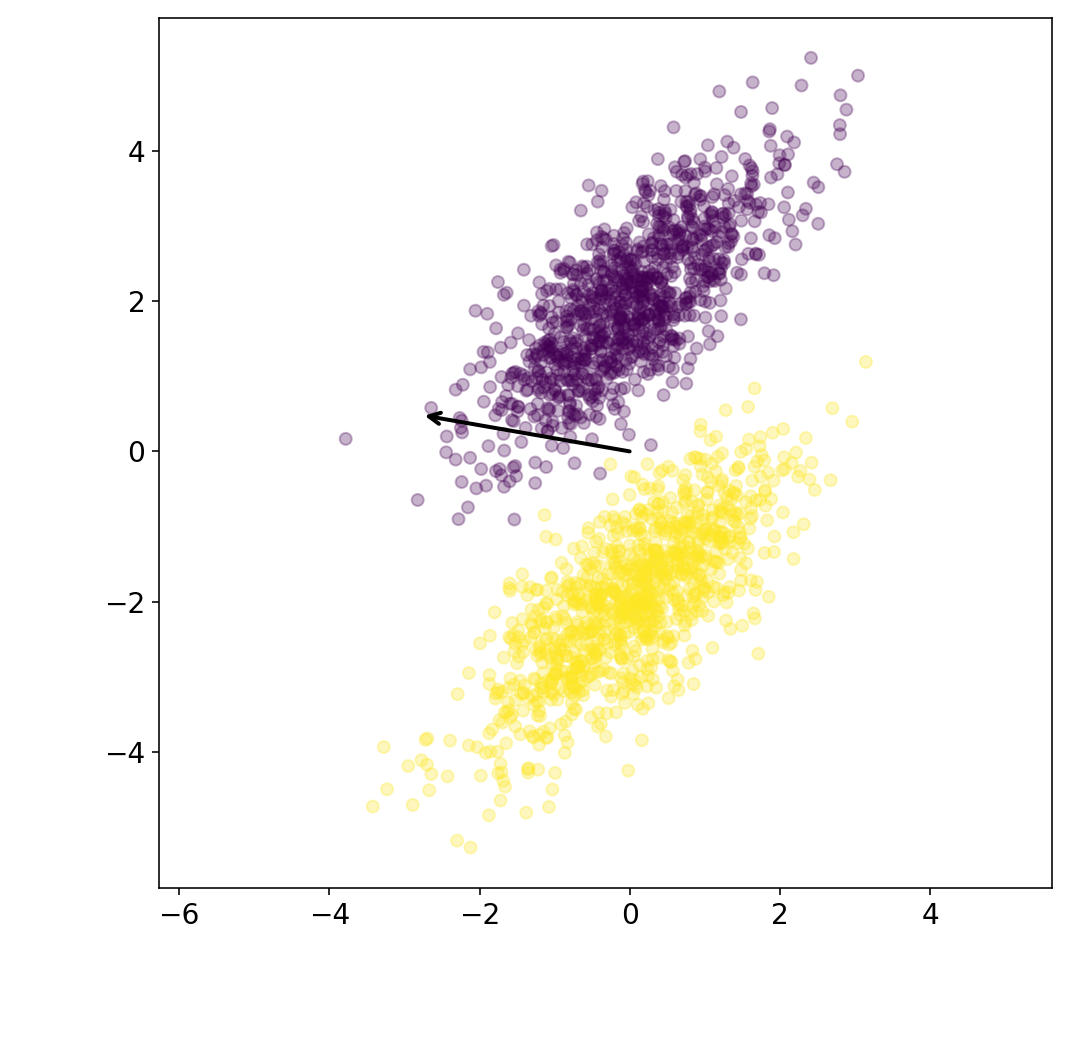

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3, c=y)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
#    v = vector * 3
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

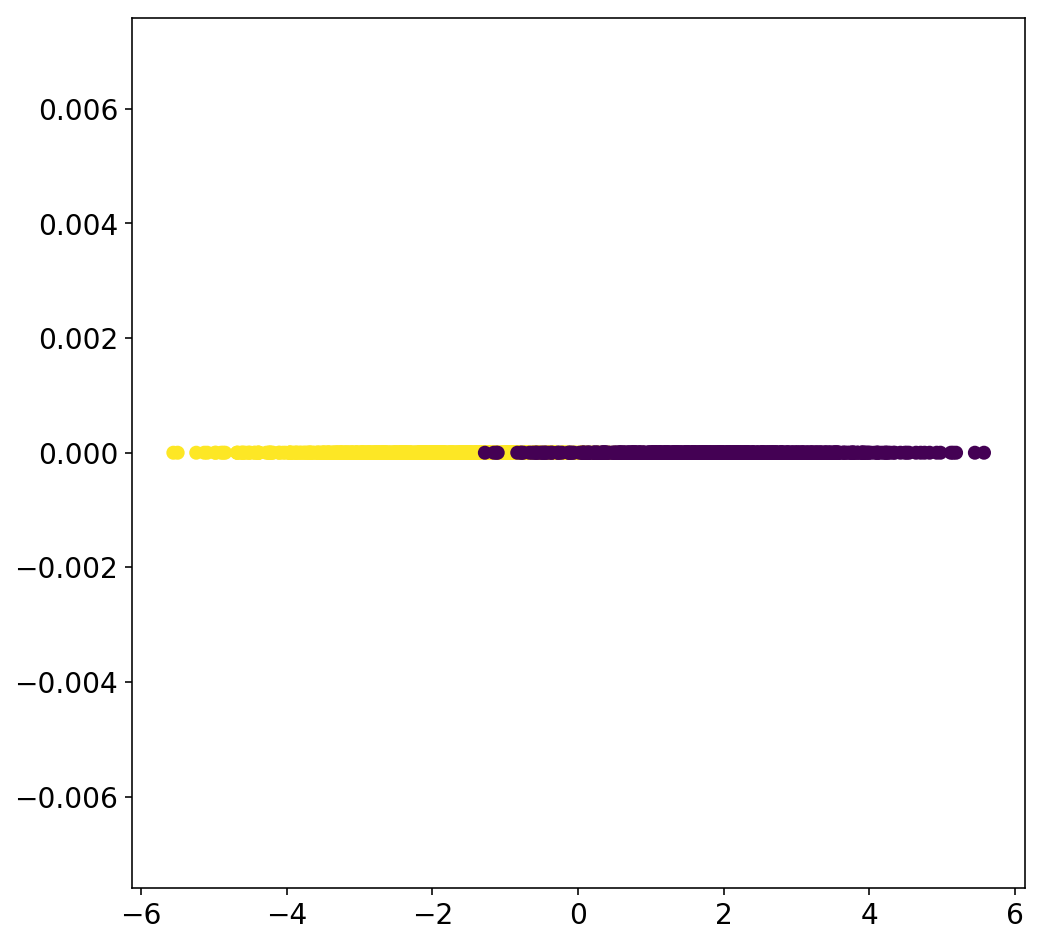

In [50]:
pca = PCA(n_components=1)
transformed = pca.fit_transform(X)
plt.scatter(transformed, [0]*transformed.shape[0], c=y)

## Question 3

Create a simple Auto Encoder using `keras`. By forcing the input through a bottleneck we can hope that the auto encoder focusses on interesting structure in the data and ignores noise. Maybe auto encoders can be used to perform denoising.

* create your own auto encoder setup or start from the one shown in the lecture. You might have to construct a auto encoder that has more layers or uses more powerful transformations like `Conv2D`, `MaxPooling2D` and `Upsampling2D`.
* make sure to load the MNIST dataset from `keras` and not the digits dataset from scikit-learn. Create a noisy version of your digits by drawing pixel values from a gaussian with mean equal to each pixel's intensity and a small standard deviation (tip: start with little/no noise to debug your auto encoder and then slowly increase the noise)
* how do you need to modify the learning setup compared to the lecture where we use `X_train` both as input and as output?

(Bonus: can you learn an "auto encoder" that rotates clean digits by 90degrees? This shuold start you off thinking about using neural networks as general purpose "transformers".)

In [144]:
from keras.datasets import mnist

# note: the MNIST dataset has more features and more samples than the digits
# dataset in scikit-learn
# Only load the training images, we don't need more and we do not care for the labels
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28)

X = x_train / 255

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_train,
                                                    train_size=0.8, random_state=1)

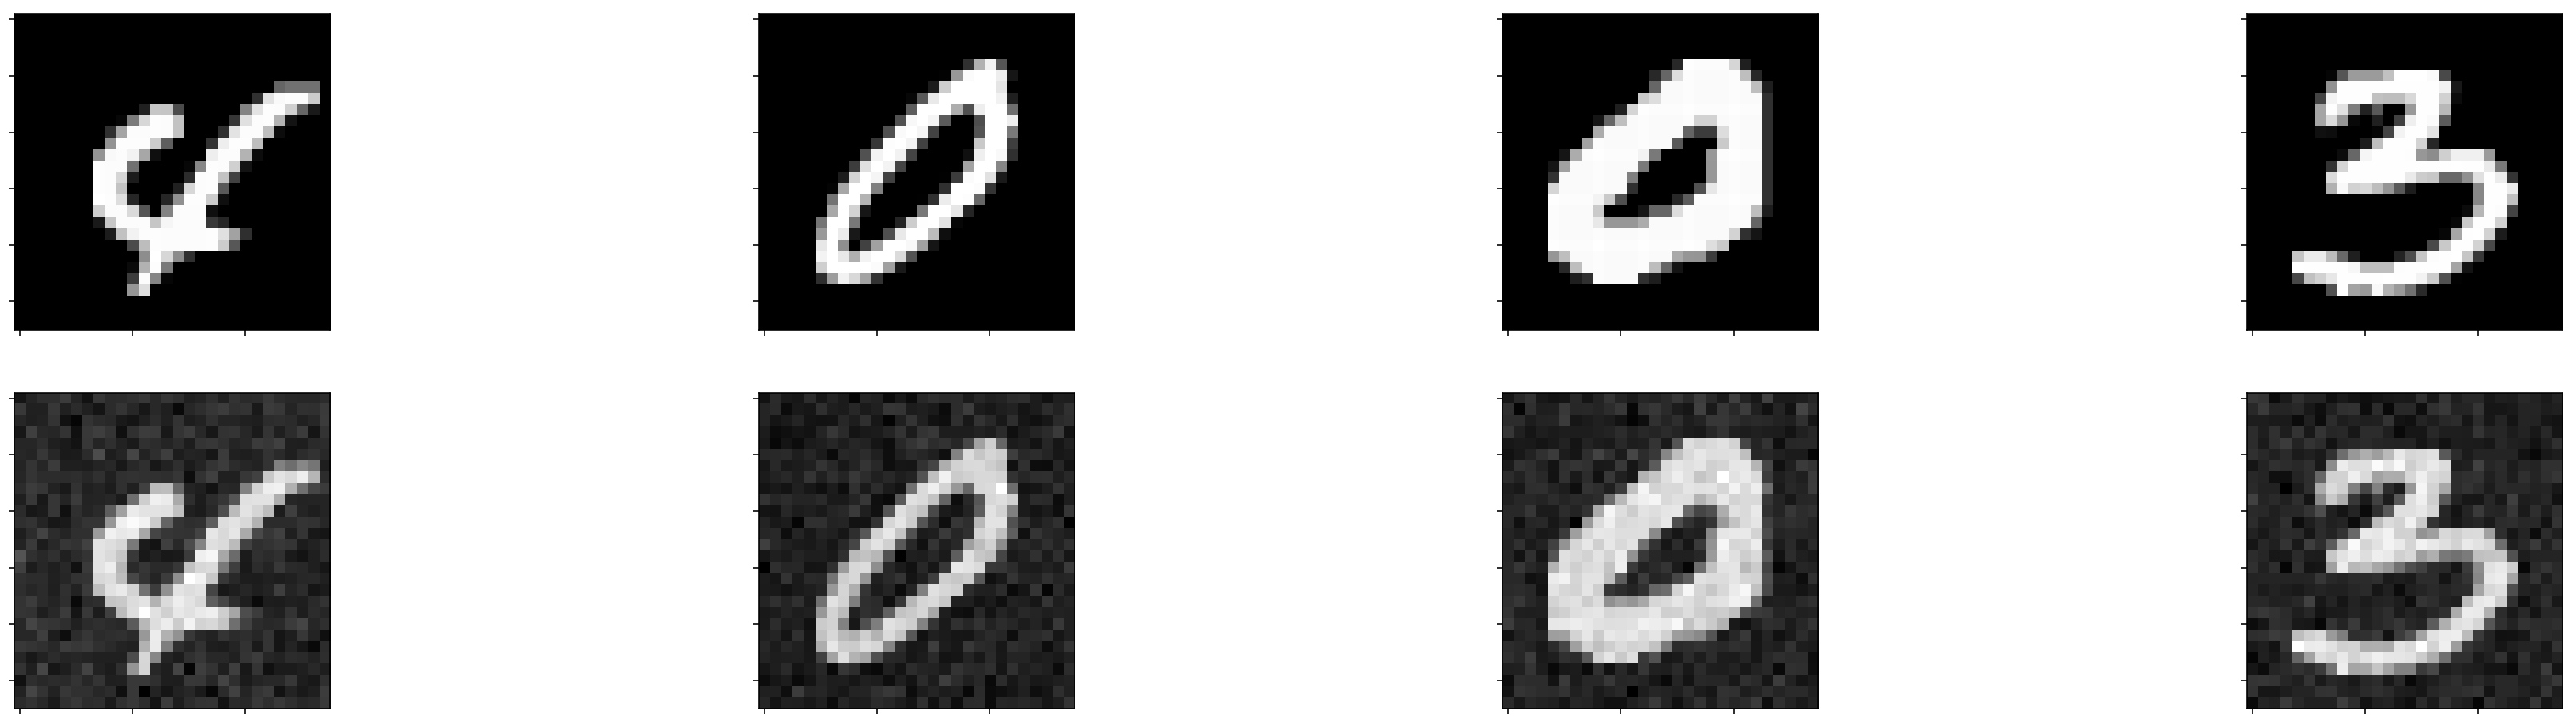

In [152]:
np.random.seed(42)
noise_level = 16.0/256.0
noisy_train = np.random.normal(X_train, noise_level)
noisy_test = np.random.normal(X_test, noise_level)

n_images = 4
fig, axs = plt.subplots(2, n_images, figsize=(n_images * 8, 8))
for i in range(n_images):
    # original
    ax = axs[0,i]
    ax.imshow(X_train[i+42].reshape(28, 28), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    # noisy
    ax = axs[1,i]
    ax.imshow(noisy_train[i+42].reshape(28, 28), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

In [155]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, UpSampling2D
from keras.models import Model

# go from 784 dimensions to 32, a reduction of factor 24
encoding_dim = 32

#input_img = Input(shape=(784,))
input_img2D = Input(shape=(28,28,1))
encoded = UpSampling2D(size=(2, 2))(input_img2D)
encoded = MaxPooling2D(pool_size=(2, 2), strides=None, padding='same')(encoded)
encoded = Flatten()(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(784, activation='relu')(encoded)

#autoencoder = Model(input_img, decoded)
autoencoder = Model(input_img2D, decoded)

In [156]:
# 2D reshape
num_samples_train = noisy_train.shape[0]
noisy_train = noisy_train.reshape((num_samples_train, 28, 28, 1))
num_samples_test = noisy_test.shape[0]
noisy_test = noisy_test.reshape((num_samples_test, 28, 28, 1))

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

model = autoencoder.fit(noisy_train, X_train,
                        epochs=10,
                        batch_size=256,
                        shuffle=True,
                        verbose=False,
                        validation_data=(noisy_test, X_test) )

In [157]:
print('final validation loss (MSE):', model.history['val_loss'][-1])

final validation loss (MSE): 0.0173863898019


In [158]:
# shortcut to perform just the encoding
encoder = Model(input_img2D, encoded)

# shortcut to perform just the decoding step
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

X_encoded = encoder.predict(noisy_test)
print(X_encoded.shape)
X_decoded = decoder.predict(X_encoded)

(12000, 32)


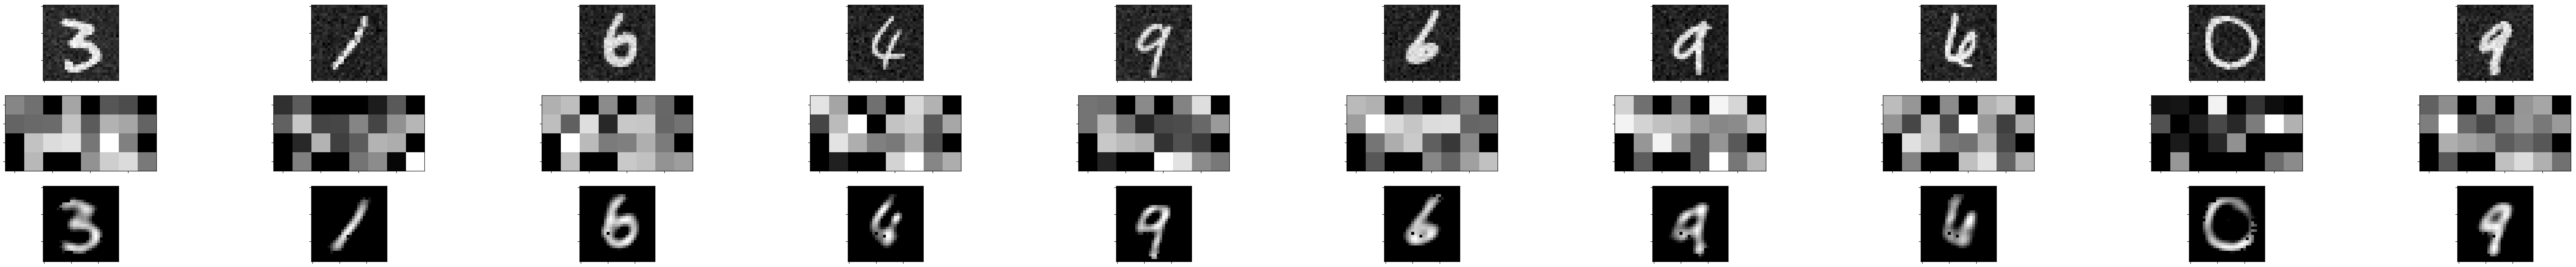

In [159]:
n_images = 10
fig, axs = plt.subplots(3, 10, figsize=(n_images * 8, 8))
for i in range(n_images):
    # original
    ax = axs[0, i]
    ax.imshow(noisy_test[i+42].reshape(28, 28), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # intermediate state
    ax = axs[1, i]
    ax.imshow(X_encoded[i+42].reshape(4, 8), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])    
    
    # reconstruction
    ax = axs[2, i]
    ax.imshow(X_decoded[i+42].reshape(28, 28), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    

[]

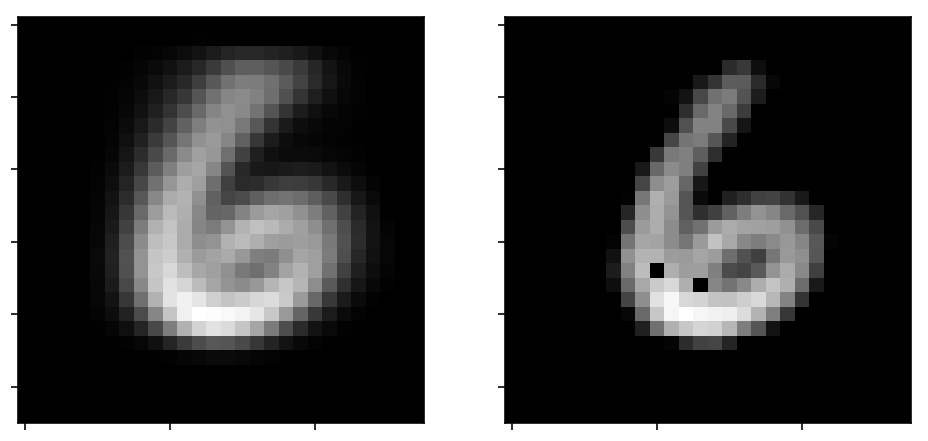

In [177]:
# one strange test

sixes = (y_test == 6)
avg_sixes = np.mean(X_test[sixes],axis=0)

new_X_encoded = np.mean(X_encoded[sixes],axis=0)

fig, axs = plt.subplots(1,2)
ax = axs[0]
ax.imshow(avg_sixes.reshape(28,28),cmap='gray')
ax.set_yticklabels([])
ax.set_xticklabels([])

new_X_decoded = decoder.predict(new_X_encoded.reshape(1,32))

ax = axs[1]
ax.imshow(new_X_decoded.reshape(28,28),cmap='gray')
ax.set_yticklabels([])
ax.set_xticklabels([])

In [183]:
A = np.array([[[1,2],[3,4]],[[5,6],[7,8]],[[9,10],[11,12]]])
print(A)
np.rot90(A,axes=(1,2))

[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]


array([[[ 2,  4],
        [ 1,  3]],

       [[ 6,  8],
        [ 5,  7]],

       [[10, 12],
        [ 9, 11]]])

(48000, 784)
(48000, 784)


[]

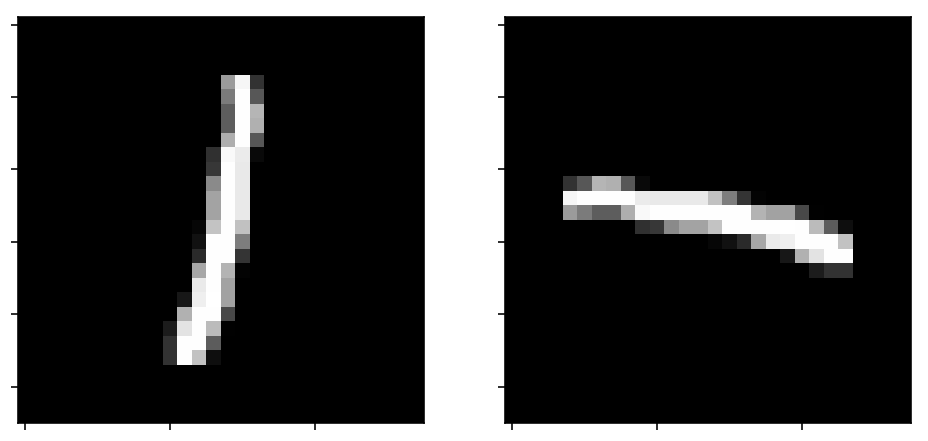

In [197]:
print(X_train.shape)
rot_X_train = np.rot90(X_train.reshape(-1,28,28),axes=(1,2))
rot_X_train = rot_X_train.reshape(-1,784)
rot_X_test = np.rot90(X_test.reshape(-1,28,28),axes=(1,2))
rot_X_test = rot_X_test.reshape(-1,784)
print(rot_X_train.shape)

fig, axs = plt.subplots(1,2)
ax = axs[0]
ax.imshow(X_train.reshape(-1,28,28)[0],cmap='gray')
ax.set_yticklabels([])
ax.set_xticklabels([])

ax = axs[1]
ax.imshow(rot_X_train.reshape(-1,28,28)[0],cmap='gray')
ax.set_yticklabels([])
ax.set_xticklabels([])

In [198]:
#rot_X_train = rot_X_train.reshape(-1,28,28,1)
#rot_X_test = rot_X_test.reshape(-1,28,28,1)

model = autoencoder.fit(X_train.reshape(-1,28,28,1), rot_X_train,
                        epochs=10,
                        batch_size=256,
                        shuffle=True,
                        verbose=False,
                        validation_data=(X_test.reshape(-1,28,28,1), rot_X_test) )

In [200]:
# shortcut to perform just the encoding
encoder = Model(input_img2D, encoded)

# shortcut to perform just the decoding step
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

X_encoded = encoder.predict(noisy_test)
print(X_encoded.shape)
X_decoded = decoder.predict(X_encoded)

(12000, 32)


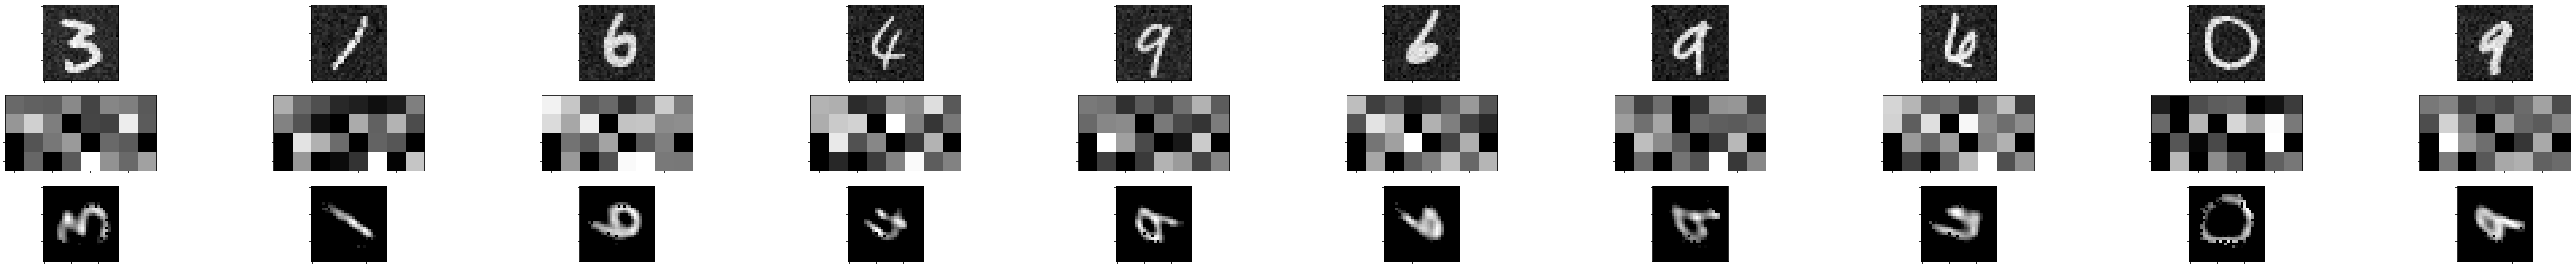

In [201]:
n_images = 10
fig, axs = plt.subplots(3, 10, figsize=(n_images * 8, 8))
for i in range(n_images):
    # original
    ax = axs[0, i]
    ax.imshow(noisy_test[i+42].reshape(28, 28), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # intermediate state
    ax = axs[1, i]
    ax.imshow(X_encoded[i+42].reshape(4, 8), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])    
    
    # reconstruction
    ax = axs[2, i]
    ax.imshow(X_decoded[i+42].reshape(28, 28), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    

---

## (Bonus) Question 4

Using your auto encoder architecture from the previous question, a clean MNIST dataset, and the ideas from the "visual search" notebook can you create a search engine that can find images similar to the query image?

In [ ]:
# your answer here